# Tipping elements

[Wolfram Barfuss](https://wbarfuss.github.io) | [University of Bonn](https://www.uni-bonn.de) | 2024/2025 <br>
▶ **Complex Systems Modeling of Human-Environment Interactions**

## Motivation

Think of the term "tipping point" in the context of sustainability. What do you associated with it?
What does it mean? What are examples of tipping points in the context of human-environment interactions?

##### Tipping points, elements and regime shifts

![Tipping points, elements and regime shifts](images/02.02-TippingPointsElementsRegimeShifts.png)

The concepts of tipping elements and regime shifts are closely related aspects of complex systems dynamics. While tipping elements refer more to the components of a system with the potential for abrupt change, regime shifts refer more to the actual transitions that occur when these elements cross their critical thresholds. Also, the term tipping elements is used more in the context of Earth system science, while regime shifts are used more in the context of social-ecological systems.

##### Climate tipping risks

![Climate tipping risks](images/02.02-ClimateTippingRisks.png)

Climate tipping points are thresholds in the **Earth's climate system** that, such as a slight increase in global average temperature, when crossed, can lead to significant and potentially irreversible changes.
These changes can trigger **reinforcing feedback loops** that push the system into a new equilibrium, potentially leading to severe consequences like accelerated ice melt or shifts in ocean currents. 
For instance, the collapse of the West Antarctic ice shelves is a potential climate tipping point that could lead to substantial sea level rise and other impacts.
While some tipping points may be **triggered within the 1.5-2°C Paris Agreement range**, many more become likely at 2-3°C of warming  [@ArmstrongMcKayEtAl2022].

##### Global Tipping Points

![Parts of the earth system with tipping points](images/02.02-GlobalTippingPoints.png)

While climate tipping points are specific to the Earth's climate systems and their feedback mechanisms, global tipping points [@LentonEtAl2023a] consider a wider array of **interconnected systems, including human and ecological dimensions**, highlighting the complex interplay between natural and societal changes. **Natural tipping points** may occur over the entire Earth system, from the Biosphere to the Cryosphere, the Oceans and the Atmosphere.

Currently, several major tipping points are at imminent risk due to global warming, with more projected as temperatures rise above 1.5°C. The cascading effects of these negative tipping points could overwhelm global social and economic systems, outpacing some countries' adaptive capacities. Addressing these crises requires a transformative shift away from incremental changes **towards a robust global governance framework** that prioritizes **rapid emission reductions** and **ecological restoration**. 

##### Social tipping points 
to the rescue?

![Social tipping points](images/02.02-SocialTippingPoints.dio.png)

Simultaneously, it's crucial to identify and harness **positive tipping points**, where beneficial changes can become self-sustaining, potentially offsetting some negative impacts. 
There is an urgent need to build **resilient societies** capable of withstanding impending challenges and seizing opportunities for sustainable progress. The paradigm of 'business as usual' is obsolete; instead, a proactive approach to governance and global cooperation is essential to navigate towards a sustainable future, leveraging both the threats and opportunities posed by tipping points [@LentonEtAl2023a].


##### Challenges

**So what exacltly are tipping elements and regime shifts?**

How can we identify them? 

And how can we manage them?

*Here, the mathematics of bifurcations can help.*

### Learning goals

After this chapter, students will be able to:

* **Explain** the concept of a **bifurcaton** and how it relates to tipping points and regime shifts.
* Explain a simple **dynamic system to model a tipping element** or regime shift.
* Explain what an *attractor*, *transient*, *basin of attraction* and *separatrix* are.
* Conduct a **bifurcation analysis** in a simple dynamic system using Python. 
* **Construct** a **potential function** and explain its role in bifurcation analysis.
* Explain and recognize **hysteresis** and its consequences for sustainability transitions.

## Bifurcations | The mathematics of tipping elements

The key question bifurcation theory addresses is: **How does the system’s long-term behavior depend on its parameters?**

The **distinction** between a system's *state* and its *parameters* is **crucial**. The state of a system is the set of variables that describe the system at a given time, while the parameters are the constants that define the system's behavior.

Often, a small change in parameter values causes only a small or even no quantitative change in the system’s state. However, sometimes, a slight change in parameter values causes a drastic, qualitative change in the system’s behavior.

> A **bifurcation** is a qualitative, topological change of a dynamic system’s phase space that occurs when some parameters are slightly varied across their **critical thresholds**.

Here, we cover the very basics of bifurcation theory in dynamic systems. These provide a rich understanding of tipping points and regime shifts in the sustainability sciences.

We start by importing the necessary libraries and setting up the plotting environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive

import matplotlib.style as style; style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (7.8, 2.5); plt.rcParams['figure.dpi'] = 300
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]  # get the first color of the default color cycle
plt.rcParams['axes.facecolor'] = 'white'; plt.rcParams['grid.color'] = 'gray'; plt.rcParams['grid.linewidth'] = 0.25; 

We also inlcude some keys functions to simulate dynamic systems from [02.01-Nonlinearity](02.01-Nonlinearity.ipynb).

To run the model we copy and refine an `iterate_model` function. 

In [2]:
def iterate_model(nr_timesteps, initial_value, update_func, **update_params):
    stock = initial_value
    time_series = [stock]
    for t in range(nr_timesteps):
        stock = update_func(stock, **update_params)
        if np.abs(stock)>10e9: break  # stop the simulation when x becomes too large
        time_series.append(stock)
    return np.array(time_series)

We also copy define a `plot_stock_evolution` function, plotting the stock evolution.

In [3]:
def plot_stock_evolution(nr_timesteps, initial_value, update_func,
                         **update_parameters):
    time_series = iterate_model(nr_timesteps, initial_value, 
                                update_func, **update_parameters)
    plt.plot(time_series, '.-', label=str(update_parameters)[1:-1]);
    plt.xlabel("Time steps"); plt.ylabel("System state");
    return time_series

And last, we copy the cobweb plot function over.

In [4]:
def cobweb(F, x0, params, iters=10, ax=None):
    h=[x0]; v=[x0]; x=x0  # lists for (h)orizontal and (v)ertical points
    for _ in range(iters):  # iterate the dynamical system
        x_ = F(x, **params)  # get the next system's state
        if np.abs(x)>10e9: break  # stop the simulation when x becomes too large
        h.append(x); v.append(x_)  # going vertically (changing v)
        h.append(x_); v.append(x_)  # going horizontially (changing h)
        x = x_  # the new system state becomes the current state

    fix, ax = plt.subplots(1,1) if ax is None else None, ax  # get ax
    ax.plot(h, v, 'k-', alpha=0.5)  # plot on axv
    if np.allclose(h[-2],h[-1]) and np.allclose(v[-1],v[-2]):
        # if last points are close, assume convergence
        ax.plot([h[-1]], [v[-1]], 'o', alpha=0.7)  # plot dot
        
    return h, v

### A minimal model of tipping elements

Let $x$ denote the **property of a system we are interested** in, such as the amount of ice in the Arctic, the population of a species, or the fraction of a lake's surface coverd by vegetation [@SchefferEtAl2001]. Thus, we describe the system's state over time $t$ by $x_t$.

Conceptually, the system's dynamics are influenced by a **reinforcing feedback loop**, a **balancing feedback loop**, an **external influence** $c$. The exertnal influence $c$, for example, represents the global mean temperature in the case of climate tipping elements, or the level of nutrients in the example of a lake regime shift. 

![Tipping element model](images/02.02-TippingModel.dio.png)

A simple mathematical representation of such a system has the difference euqation,

$$\Delta x = (x - ax^3 + c) \frac{1}{\tau},$$

where $\tau$ represents the typical time scale of the system, and thus, inverse strength of the system's change, and $a$ is a parameter that determines the strength of the balancing feedback loop in relation to the reinforcing feedback loop (with unit stength).

We define the `update_stock` function, $F(x_{t}$ for the udpate $x_{t+1}=F(x_t)$, to iterate the stock $x$ according to the difference equation above.

In [5]:
def F_tipmod(x, c, a=1, tau=10): return x + (x - a*x**3 + c)/tau

We explore the stock's evolution over time from two different initial conditions by iterating the model for 200 time steps.

In [6]:
def compare_initial_conditions(nr_timesteps=200, c=0.0, tau=50, a=1):
    plot_stock_evolution(nr_timesteps, 1.2, F_tipmod, c=c, tau=tau, a=a);
    plot_stock_evolution(nr_timesteps, -1.2, F_tipmod, c=c, tau=tau, a=a);
    paramstring = f"c={c}, tau={tau}, a={a}"
    plt.gca().annotate(paramstring, xy=(0, 1.0), xycoords='axes fraction', va='bottom', ha='left'); plt.show()

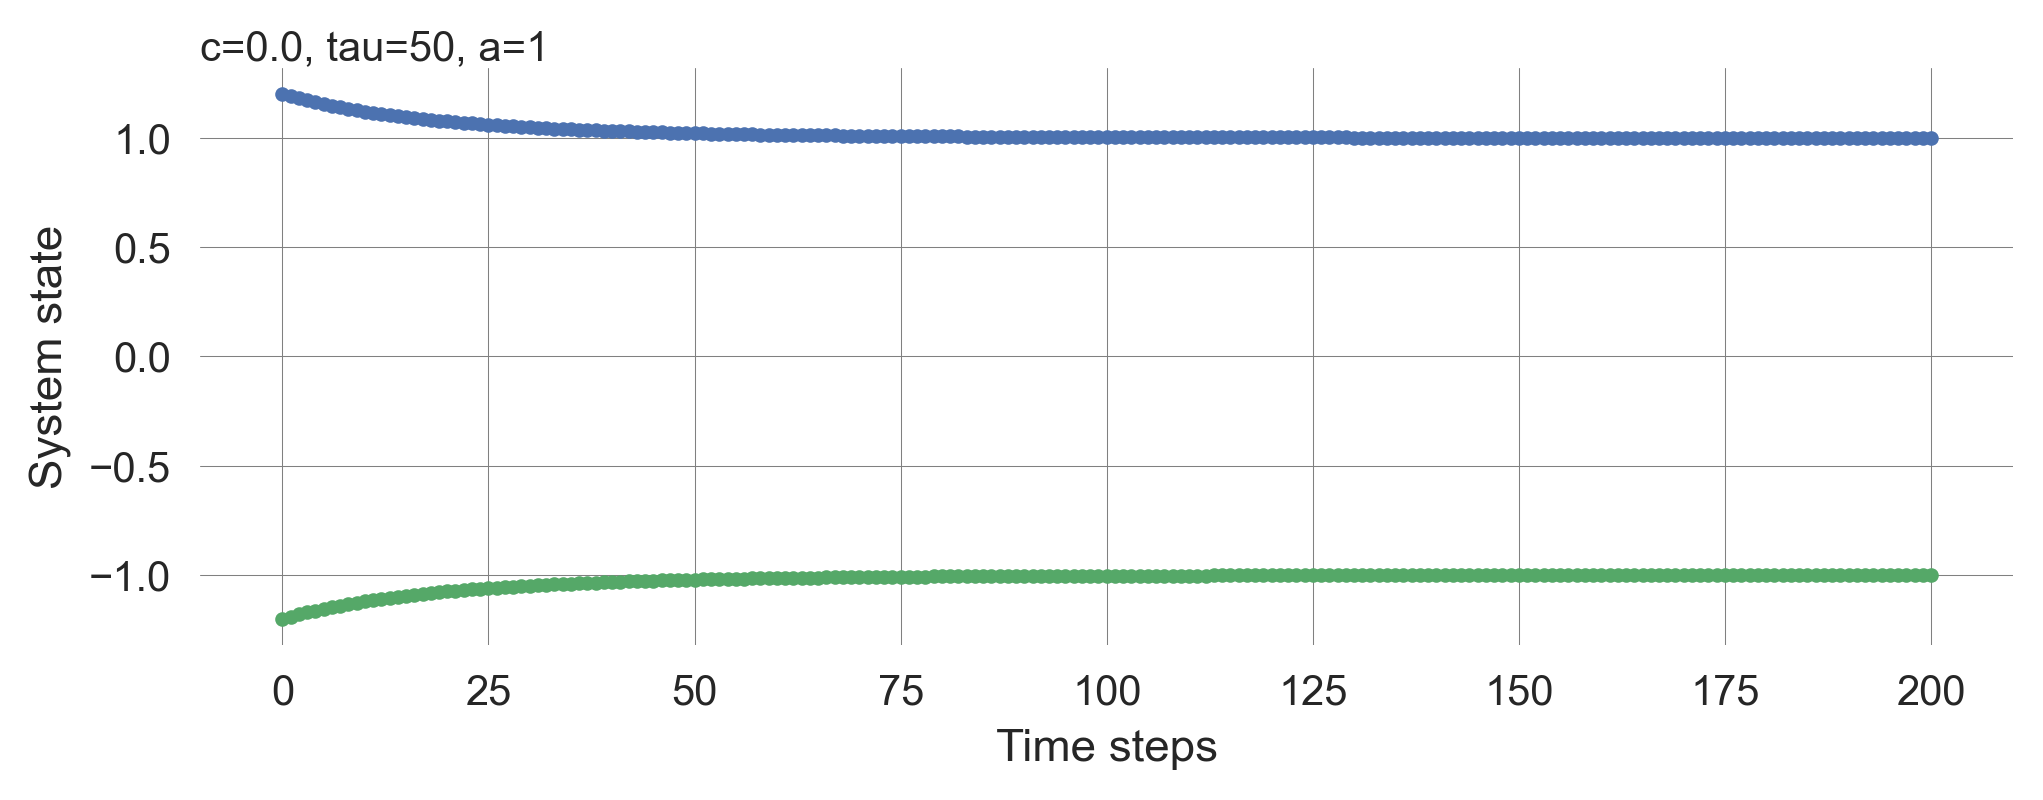

In [7]:
compare_initial_conditions()

**We observe bi-stability.** Depending on where the dynamical system starts, it will either converge to the fixed point $x_e = 1.0$, or the the fixed point $x_e = -1.0$

*How do the parameters influence the system's evolution?* We can convince ourselves that 
the timescale parameter $\tau$ determines the speed of the system's evolution (vary $\tau$ and the total number of simulation staps proportionally: the curves's shapes look identical).
The parameter $a$ scales the system's fixed points (vary $a$ and observe the system's behavior).
Finally, We can also observe, that the external influence $c$ can change the system's equilibrium state.
Run this notebook interactivly and confirm  these observations for yourself!


::: {.content-hidden unless-profile="interactive"}

In [8]:
interact(compare_initial_conditions, nr_timesteps=(10, 200, 10), c=(-2, 2, 0.1), tau=(1, 100, 1), a=(0.1, 2, 0.1));

interactive(children=(IntSlider(value=200, description='nr_timesteps', max=200, min=10, step=10), FloatSlider(…

:::

### Cobweb plot

Let us observe thhis phenomenon of bi-stability in a cobweb plot.

In [9]:
def cobweb_plot(c=0, tau=1.5, a=1): 
    xs = np.linspace(-2,2,101); plt.xlabel('x'); plt.ylim(-1.3,1.3); plt.xlim(-1.6,1.6);
    plt.plot(xs, F_tipmod(xs, c,a,tau), label='F(x)'); 
    plt.plot(xs, xs, label='x', color='k', alpha=0.5); plt.legend();
    cobweb(F_tipmod, x0=0.3, params=dict(c=c, a=a, tau=tau), iters=100, ax=plt.gca());
    cobweb(F_tipmod, x0=-0.3, params=dict(c=c, a=a, tau=tau), iters=100, ax=plt.gca());

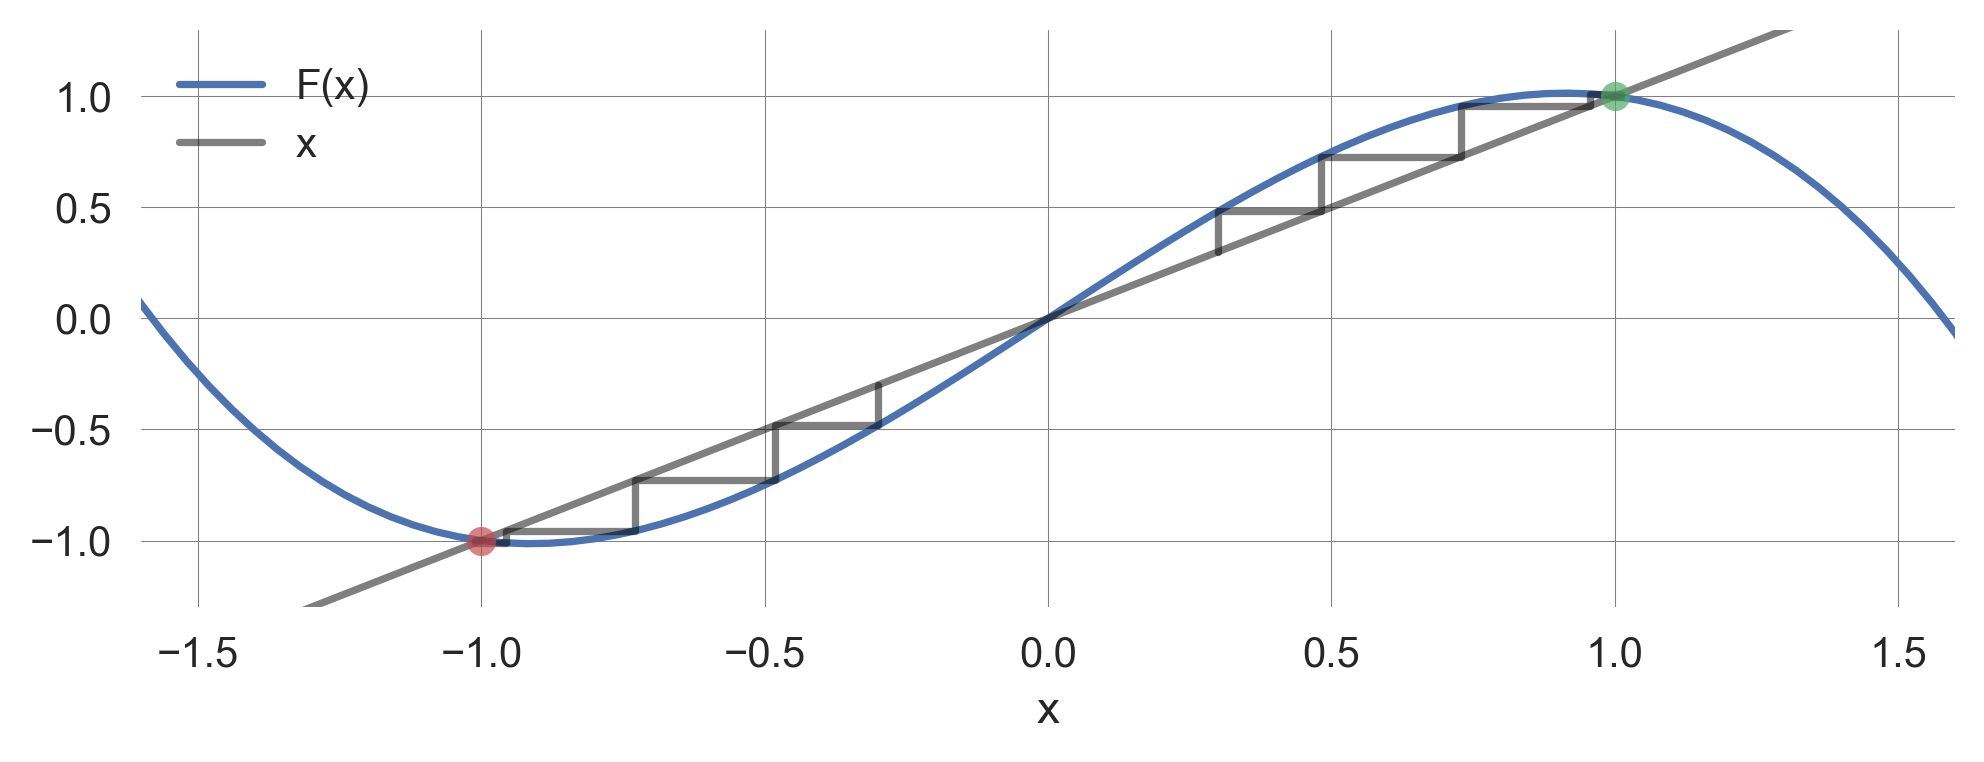

In [10]:
cobweb_plot()

We see, that it depends on where the update function $F(x_t)$ intersects the diagonal line $y=x$ whether an inital condition converges to the fixed point $x_e = 1.0$ or $x_e = -1.0$. The external influence parameter $c$ determines this intersection point

*Some definitions.*

An **attractor** is a set of states toward which a dynamic system tends to evolve over time.
These states represent the system's long-term behavior. 
Once the system reaches an attractor, it typically remains there. For example, in the system above the attractors are the fixed points $x_e = 1.0$ and $x_e = -1.0$.

A **transient** refers to the behavior of a system during a limited period of time before it reaches an attractor. For example, the cobweb plot shows the transient behavior of the system.

A **basin of attraction** the set of all the initial states from which you will eventually end up falling into that attractor. For example, in the system above, the basin of attraction for the fixed point $x_e = 1.0$ are all point greater than the intersection point between $F(x_t)$ and $y=x$. The basin of attraction for the fixed point $x_e = -1.0$ are all points less than the intersection point between $F(x_t)$ and $y=x$.

If there are more than one attractor in the phase space, you can divide the phase space into several different regions. In this case, a **separatrix** is the boundary between distinct basins of attractions. For example, in the system above, the separatrix consists only of the intersection point between $F(x_t)$ and $y=x$.

::: {.content-hidden unless-profile="interactive"}

In [11]:
interact(cobweb_plot, a=(-1, 10., 0.01), tau=(0.5, 10, 0.1), c=(-1, 1., 0.1));

interactive(children=(FloatSlider(value=0.0, description='c', max=1.0, min=-1.0), FloatSlider(value=1.5, descr…

:::

### Empirical bifurcation diagram

A bifurcation diagram is a powerful tool to visualize the system's long-term behavior as a function of its parameters. To create a bifurcation diagram, we iterate the model for a range of parameter values and plot the system's equilibrium states.

In [12]:
def simulate_bifurcation_diagram(F, x0s, params, iters=1000, cextent=[-0.5,0.5],
                                 pointsize=2.0):
    c_s = np.linspace(cextent[0], cextent[1], 501) # The external parameter to be varied
    for x0 in x0s:  # Loop through all initial conditions
        endpoints = []  # Container to store the endpoints
        for c in c_s:  # Loop through all external parameter values
            trj = iterate_model(iters, x0, F, c=c, **params)  # Simulate the system
            endpoints.append(trj[-10:])  # Taking the last 10 points of the trajectory
        # Plotting the endpoints
        cpoints = [[c_s[i]]*l for i, l in enumerate(map(len, endpoints))]  # create cpoints that may work for different endpoint lengths
        plt.scatter(np.hstack(cpoints), np.hstack(endpoints), c='k', alpha=0.5,
                    s=pointsize);  # np.hstack unpacks everything      
    plt.ylabel(r'Equilibrium state $x$'); plt.xlabel(r'External influence $c$')

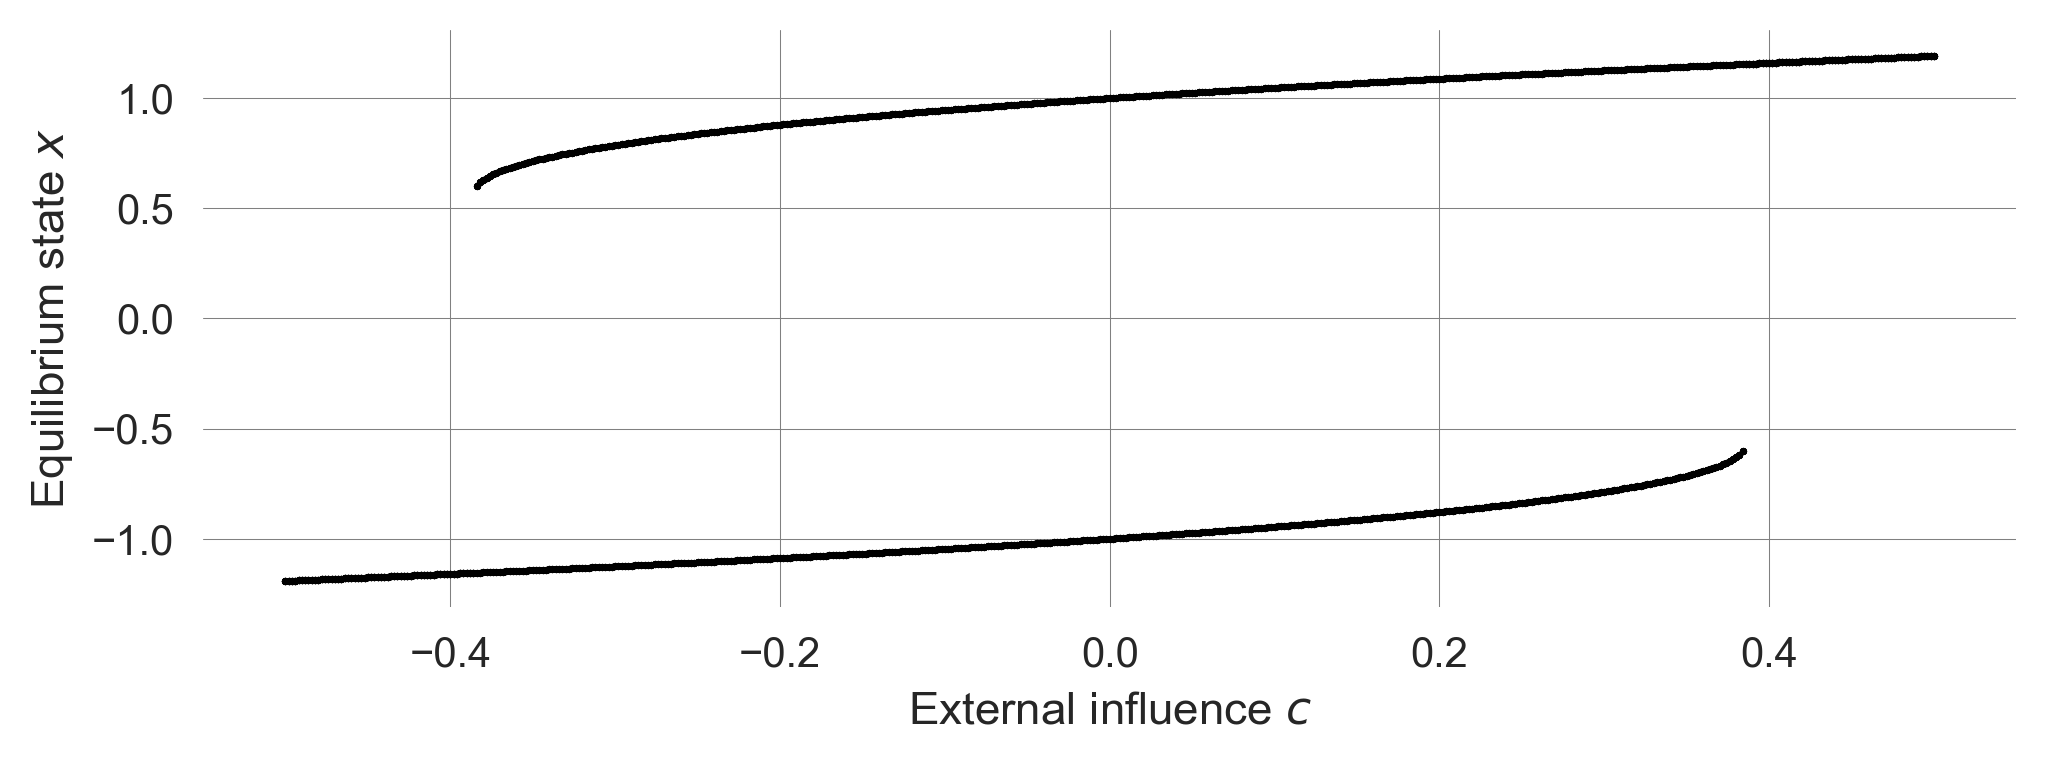

In [13]:
simulate_bifurcation_diagram(F_tipmod, x0s=[-1.5, 1.5], params=dict(tau=10 , a=1.0), iters=1000)

This **empirical bifurcation diagram** allows us to identify the system's stable fixed points as a function of the parameter $c$. 
We observe the **range of parameter values** for which the system **converges** to the fixed points around $x_e = 1.0$ and $x_e = -1.0$, as well as the range where the system is **bi-stable**. 
We also observe the **critical values** of $c$ where the system undergoes a qualitative change in its behavior. When the external parameter $c$ changes around these critical values in $c$ (close to $-0.4$ and $0.4$ here), a tiny change causes a drastic effect on the system state.

### Conducting a bifurcation analysis

Local bifurcations occur when the stability of an equilibrium point changes between stable and unstable. 

1) **Determine** the **equilibirum points** in dependence of the model parameters
2) **Determine** the **stability** of the equilibirum points in dependence of the model parameters. For one-dimensional systems $x_{t+1} = F(x_{t})$, an equilibrium point is stable when $|F'(x_e)| < 1$.
3) **Bifurcations** occur at parameter values at which the **stability changes**. For one-dimensional systems $x_{t+1} = F(x_{t})$, local bifurcations occur when $|F'(x_e)|=1$.


### Step 1 | Equilibrium points

The equilibrium points for $\Delta x = \frac{1}{\tau}(x - ax^3 + c)$  fulfill,

$$c = ax^3 - x.$$

It is not straightforward to solve the equation, $c=ax^3-x$, analytically, i.e., to give an expression for how the system's equilibirum depends on the parameters $c$ and $a$. However, we can plot the parameter $c$ as a function of the equilibirum points $x_e$ and the parameter $a$.

In [17]:
def plot_equilibirum_points_tipmod(a=1.0, cextent=[-2.0,2.0]):
    xe=np.linspace(-2.0,2.0,501) # equilibrium points
    c = a*xe**3 - xe # parameter c
    plt.plot(c, xe, "--"); # plot
    plt.xlabel(r'External parameter $c$'); plt.ylabel(r'Equilibrium points $x_e$');
    # plt.xlim(cextent); 

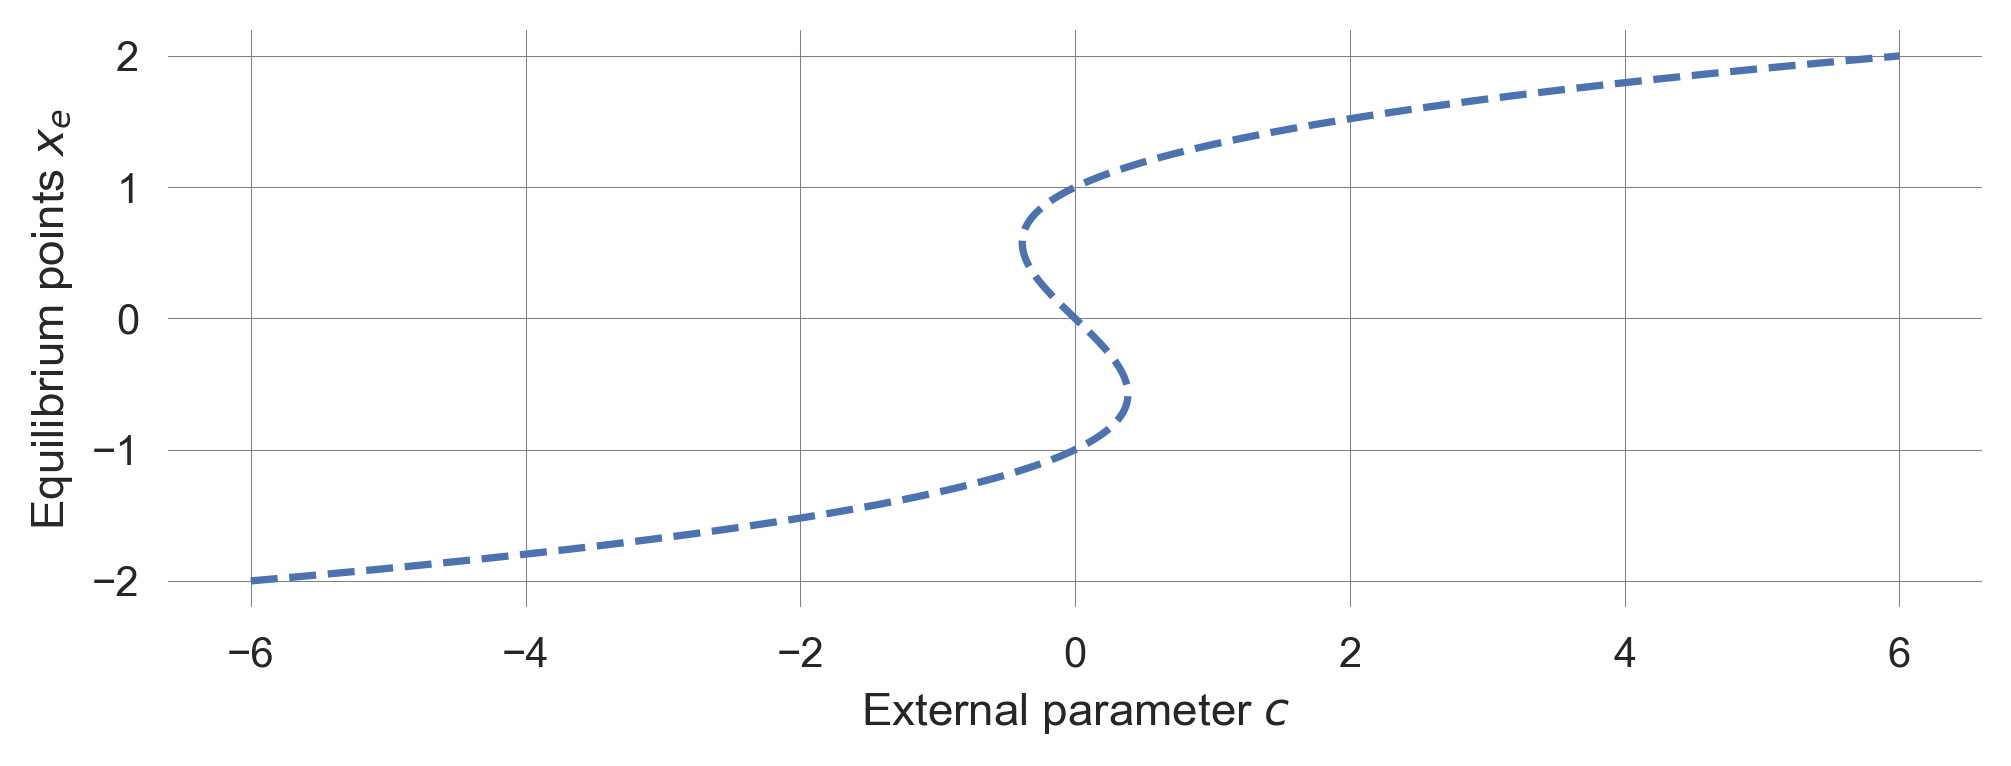

In [18]:
plot_equilibirum_points_tipmod()

### Step 2 | Stability

Computing the derivative of the update function $F(x_t) = x + \frac{1}{\tau}(x - ax^3 + c)$ , we find,

$$\frac{dF}{dx} = 1+\frac{1}{\tau} (1 - 3ax^2).$$

We create a Python function to plot the whether an equilibrium point is stable or not using the `np.logical_and` function.

In [19]:
def plot_stability_tipmod(a=1.0, tau=3.0, cextent=[-3.0,3.0]):
    xe=np.linspace(-3, 3, 1001) # equilibrium points
    c = a*xe**3 - xe # parameter c
    
    def F_(x, a,tau): return 1 + (1-3*a*x**2)/tau
    cond=np.logical_and(F_(xe, a,tau)<1, F_(xe, a,tau)>-1)
    plt.plot(c[cond], xe[cond], ".", c='red')
    
    plt.xlabel(r'External parameter $c$'); plt.ylabel(r'Equilibrium points $x_e$');
    plt.xlim(cextent); 

Brining stability and equilibrium points together, we can plot an analytical bifurcation diagram.

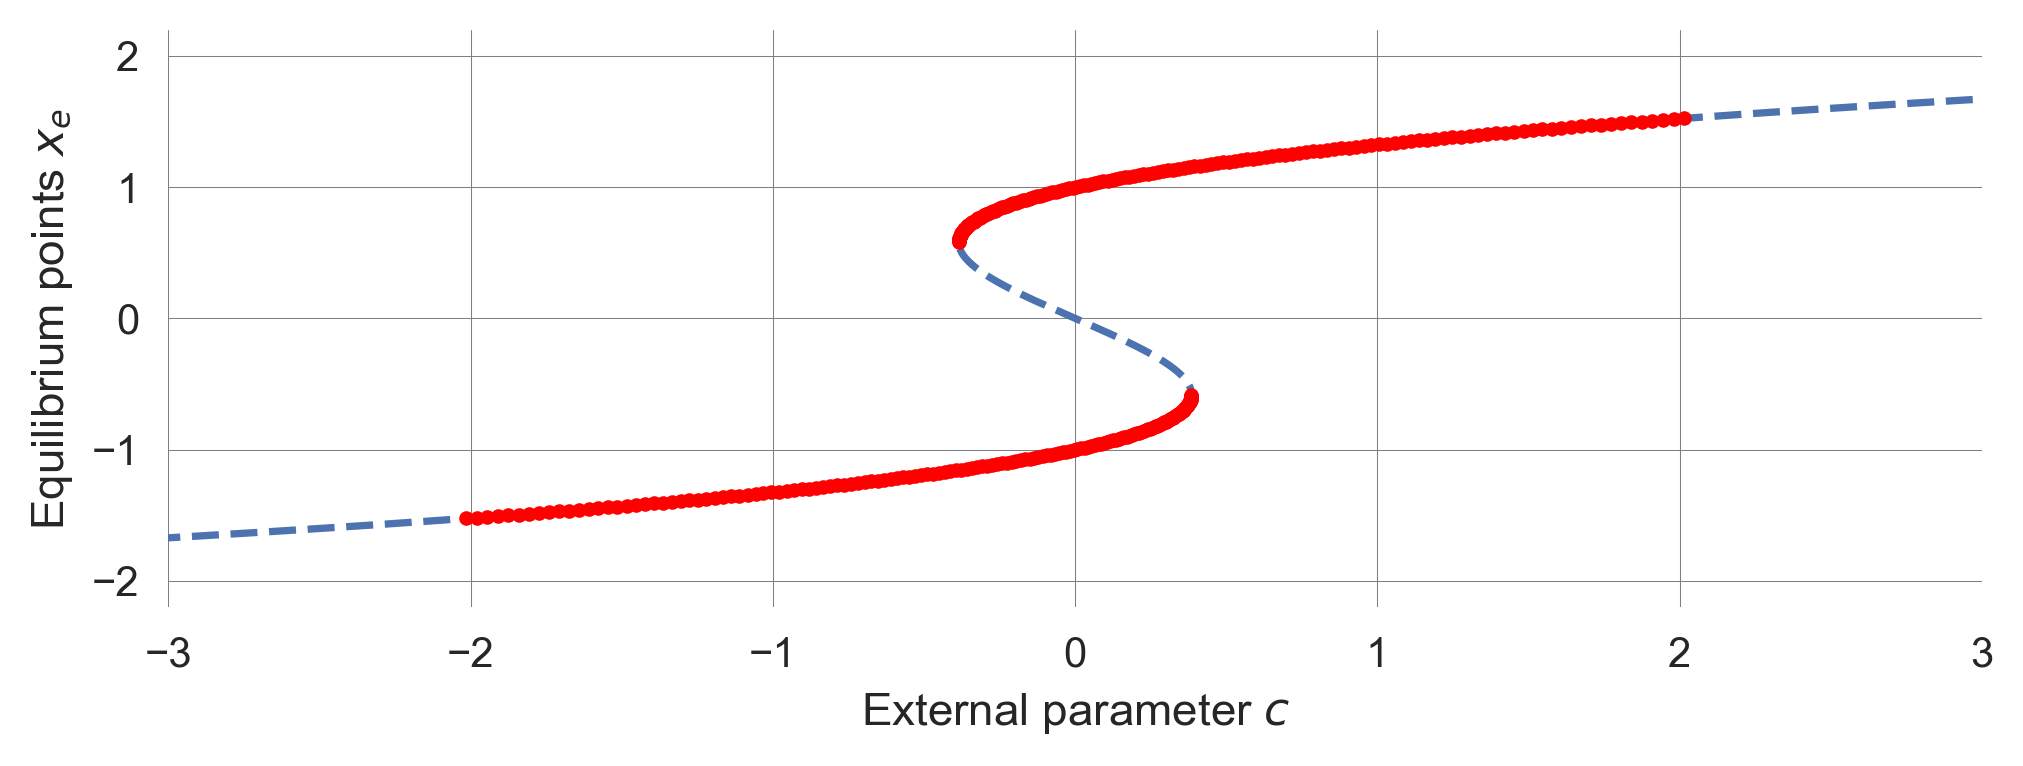

In [20]:
a = 1.0; tau=3.0
plot_equilibirum_points_tipmod(a=a);
plot_stability_tipmod(a=a, tau=tau)

### Step 3 | Bifurcation diagram

We enrich this bifurcation diagram by solving $\frac{dF}{dx} = 1+\frac{1}{\tau} (1 - 3ax^2)$ for $\frac{dF}{dx} = 1$ and $\frac{dF}{dx} = -1$ yields the **stability boundaries**

$$x_b=\pm\sqrt{\frac{1}{3a}} \quad \text{and} \quad x_b=\pm\sqrt{\frac{2\tau + 1}{3a}}.$$

We create a Python function to plot the stability boundaries.

In [21]:
def plot_stability_boundaries_tipmod(a= 1.0, tau=3, cextent=[-3.0, 3.0]):
    styl = dict(ls=":", lw=0.75, color='green')
    plt.plot(cextent,[np.sqrt(1/(3*a)), np.sqrt(1/(3*a))], **styl)
    plt.plot(cextent,[-np.sqrt(1/(3*a)), -np.sqrt(1/(3*a))], **styl) 
    plt.plot(cextent,[np.sqrt((2*tau + 1)/(3*a)), np.sqrt((2*tau + 1)/(3*a))], **styl)
    plt.plot(cextent,[-np.sqrt((2*tau + 1)/(3*a)), -np.sqrt((2*tau + 1)/(3*a))], **styl)

Bringing all togehter, we obtain our analytical bifurcation diagram.

In [22]:
def plot_analytical_bifurcation_tipmod(a = 1.0, tau = 3.0, extent=3.0):
    plot_equilibirum_points_tipmod(a=a, cextent=[-extent, extent]);
    plot_stability_tipmod(a=a, tau=tau, cextent=[-extent, extent]);
    plot_stability_boundaries_tipmod(a=a, tau=tau, cextent=[-extent, extent]);

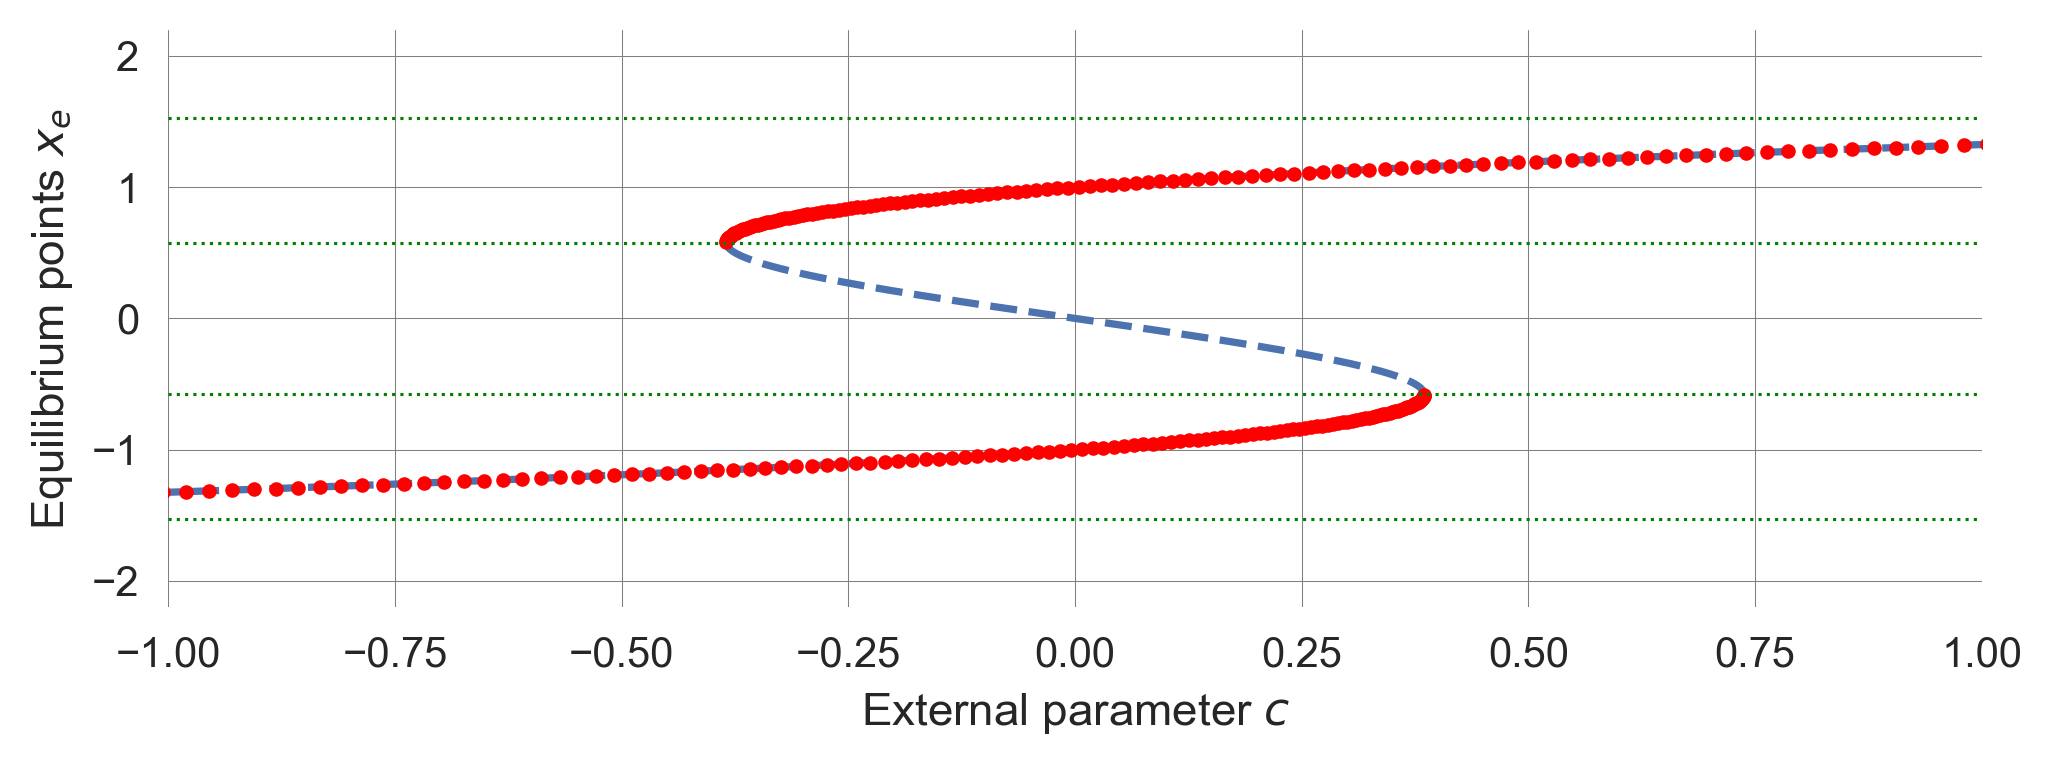

In [23]:
a = 1.0; tau = 3.0
plot_analytical_bifurcation_tipmod(a = a, tau = tau, extent=1.0)


::: {.content-hidden unless-profile="interactive"}

In [24]:
interact(plot_analytical_bifurcation_tipmod, a=(0.1, 2.0, 0.1), tau=(0.1, 10.0, 0.1), extent=(0.5, 10.0, 0.1)); 

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=0.1), FloatSlider(value=3.0, descri…

:::

Lastly, we can compare the empirical bifurcation diagram with the analytical bifurcation diagram, and observe that both match perfectly.

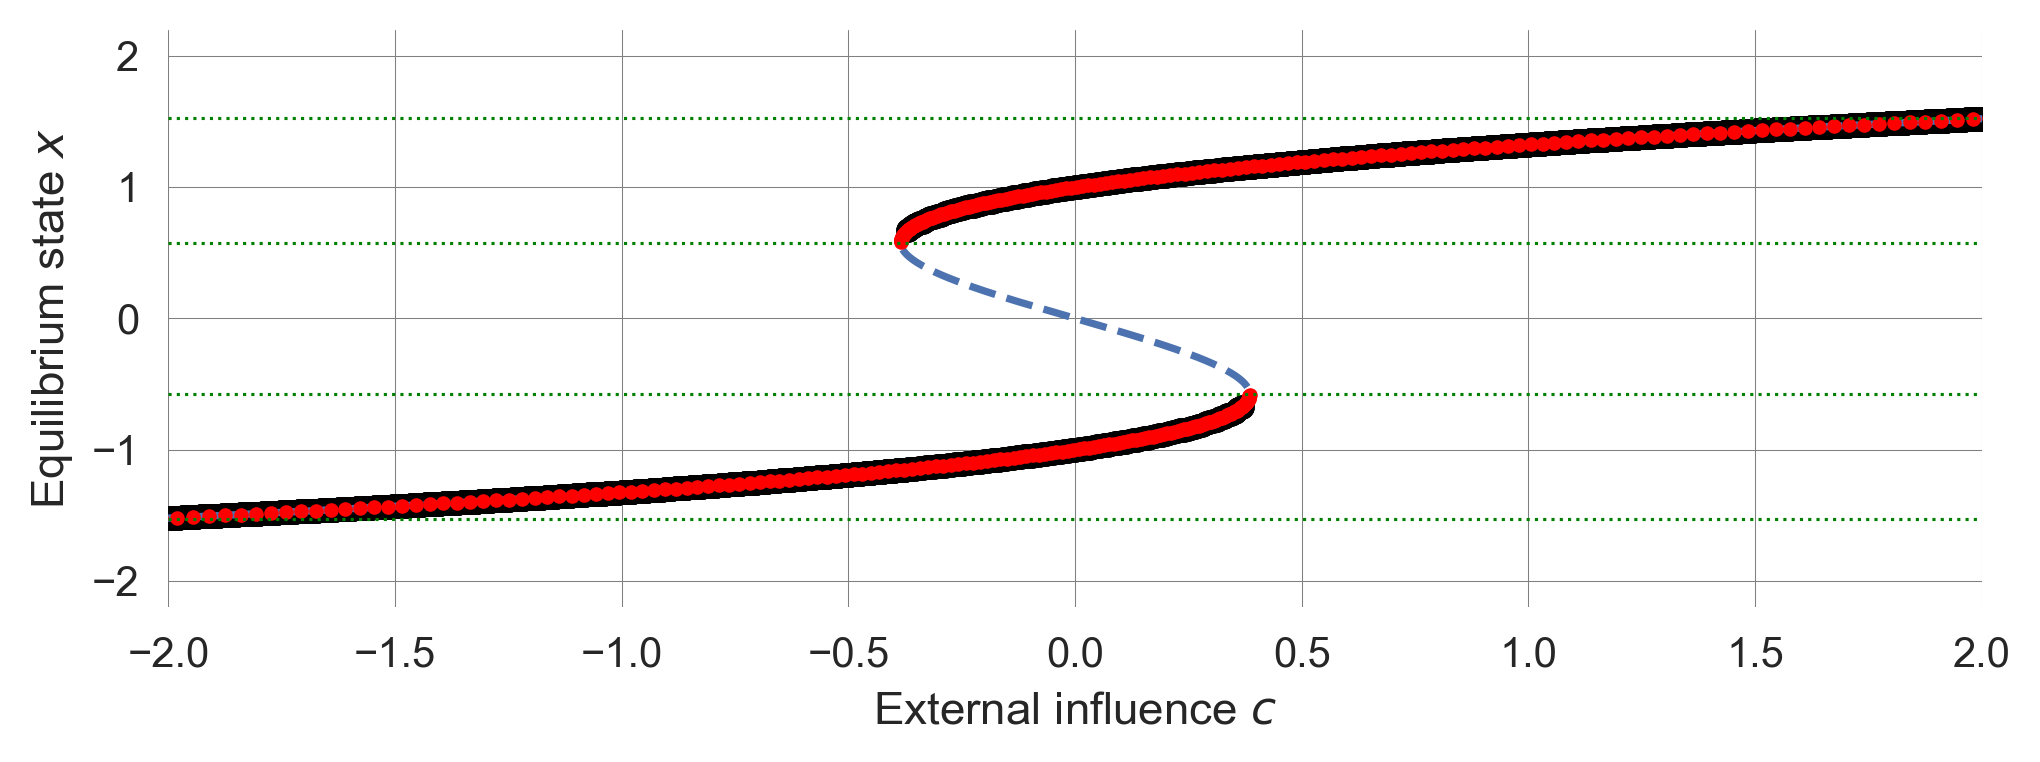

In [25]:
a = 1.0; tau = 3.0
plot_analytical_bifurcation_tipmod(a = a, tau = tau, extent=2.0)
simulate_bifurcation_diagram(F_tipmod, x0s=[-0.5, 0.5], params=dict(tau=tau , a=a), 
                             iters=500, pointsize=30, cextent=[-2.0, 2.0])

Our bifurcation analysis produces the same diagram we observed in the literature. What is still missing is the changing stability landscape portrayed in @fig-Scheffer?

![Conceptual Regime Shift](images/02.02-SchefferRegimeShifts.dio.png){#fig-Scheffer}

### Potential function

A potential is a function that describes the *energy* of a system. In the context of dynamic systems, a potential function can help us understand the system's behavior by visualizing the system's *energy* landscape.

![Illustrations of potential functions](images/02.02-LentonPotential.dio.png)

In general, there are multiple ways to define a potential function. Here, we define a potential function $G$  as the negative integral of the system change $\Delta x$. Thus, for a system $x_{t+1} = F(x_{t}) = x_{t} - \left.\frac{G(x)}{dx}\right|_{x=x_{t}}$, we have

$$\Delta x =  - \frac{G(x)}{dx}.$$

The idea is, that the system changes as if *rolling* downard (according to the first derivative of) the potential landscape $G(x)$.


Thus, for the difference equation $\Delta x = \frac{1}{\tau}(x - ax^3 + c)$, we have

$$G(x) = - \frac{1}{\tau} \left(\frac{1}{2}x^2 - \frac{1}{4}ax^4 + cx\right).$$

Converting this into Python yields,

In [26]:
def G_tipmod(x, c,a,tau): return - (x**2/2 - a*x**4/4 + c*x)/tau

which we use in a `plot_potential` function to visualize the potential landscape.

In [27]:
def plot_tipmod_potential(c=0.2, a=1.0, tau=2):
    xs=np.linspace(-2,2,501); plt.ylim(-0.5, 0.5); 
    plt.plot(xs, G_tipmod(xs, c,a,tau), color='blue')
    plt.ylabel(r'Potential $G(x)$'); plt.xlabel(r'System state $x$')
    
    #  numerically find and plot equilibrium points
    c_ = a*xs**3 - xs
    xeq = xs[np.isclose(c_-c, 0.0, atol=0.02)]
    plt.plot(xeq, G_tipmod(xeq, c, a, tau), 'o', ms=12, color='k')

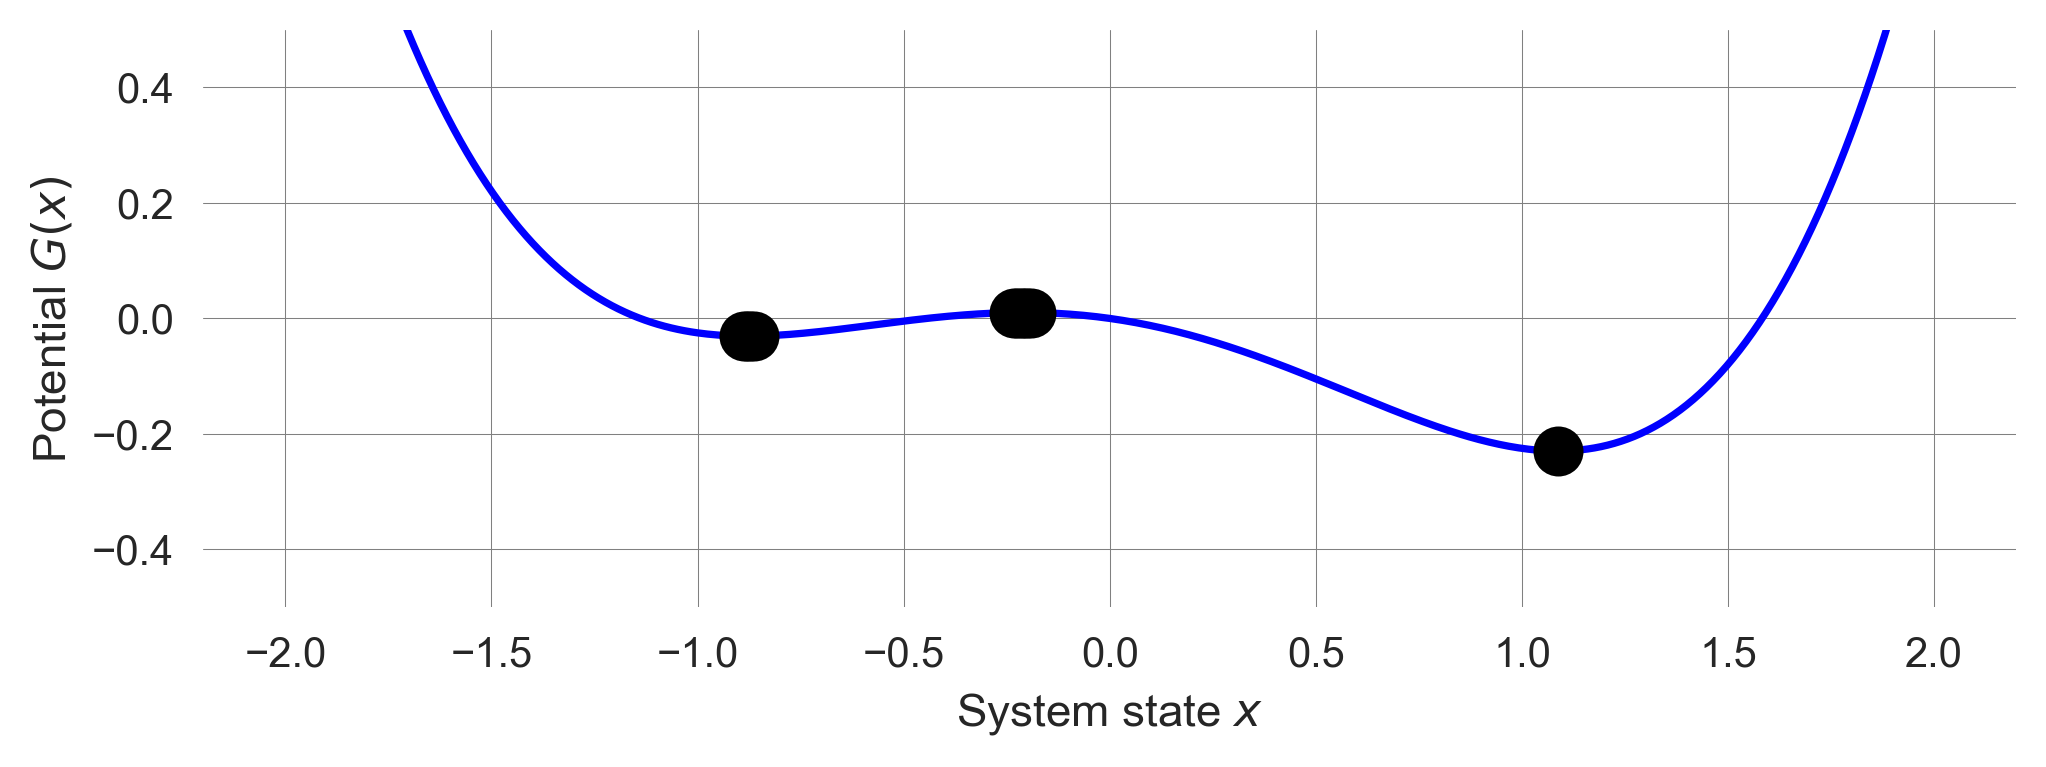

In [28]:
plot_tipmod_potential()

::: {.content-hidden unless-profile="interactive"}

In [29]:
interact(plot_tipmod_potential, c=(-2, 2, 0.1), a=(0.1, 2, 0.1), tau=(0.1, 5, 0.1));

interactive(children=(FloatSlider(value=0.2, description='c', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

:::

Finally, we bring all pieces together to visualize the system's potential landscape, bifurcation diagram and time evolution.

In [32]:
def plot_all_tipmod(c=0.2, a=1.0, tau=2):
    fig = plt.figure(figsize=(9, 4))
    
    fig.add_subplot(221)
    plot_tipmod_potential(c=c, a=a, tau=tau)

    fig.add_subplot(222)
    plot_analytical_bifurcation_tipmod(a=a, tau=tau, extent=1.4)
    plt.plot([c,c], [-2,2], "-", color='black')

    fig.add_subplot(313)
    compare_initial_conditions(nr_timesteps=50, c=c, tau=tau, a=a)
    
    plt.tight_layout();

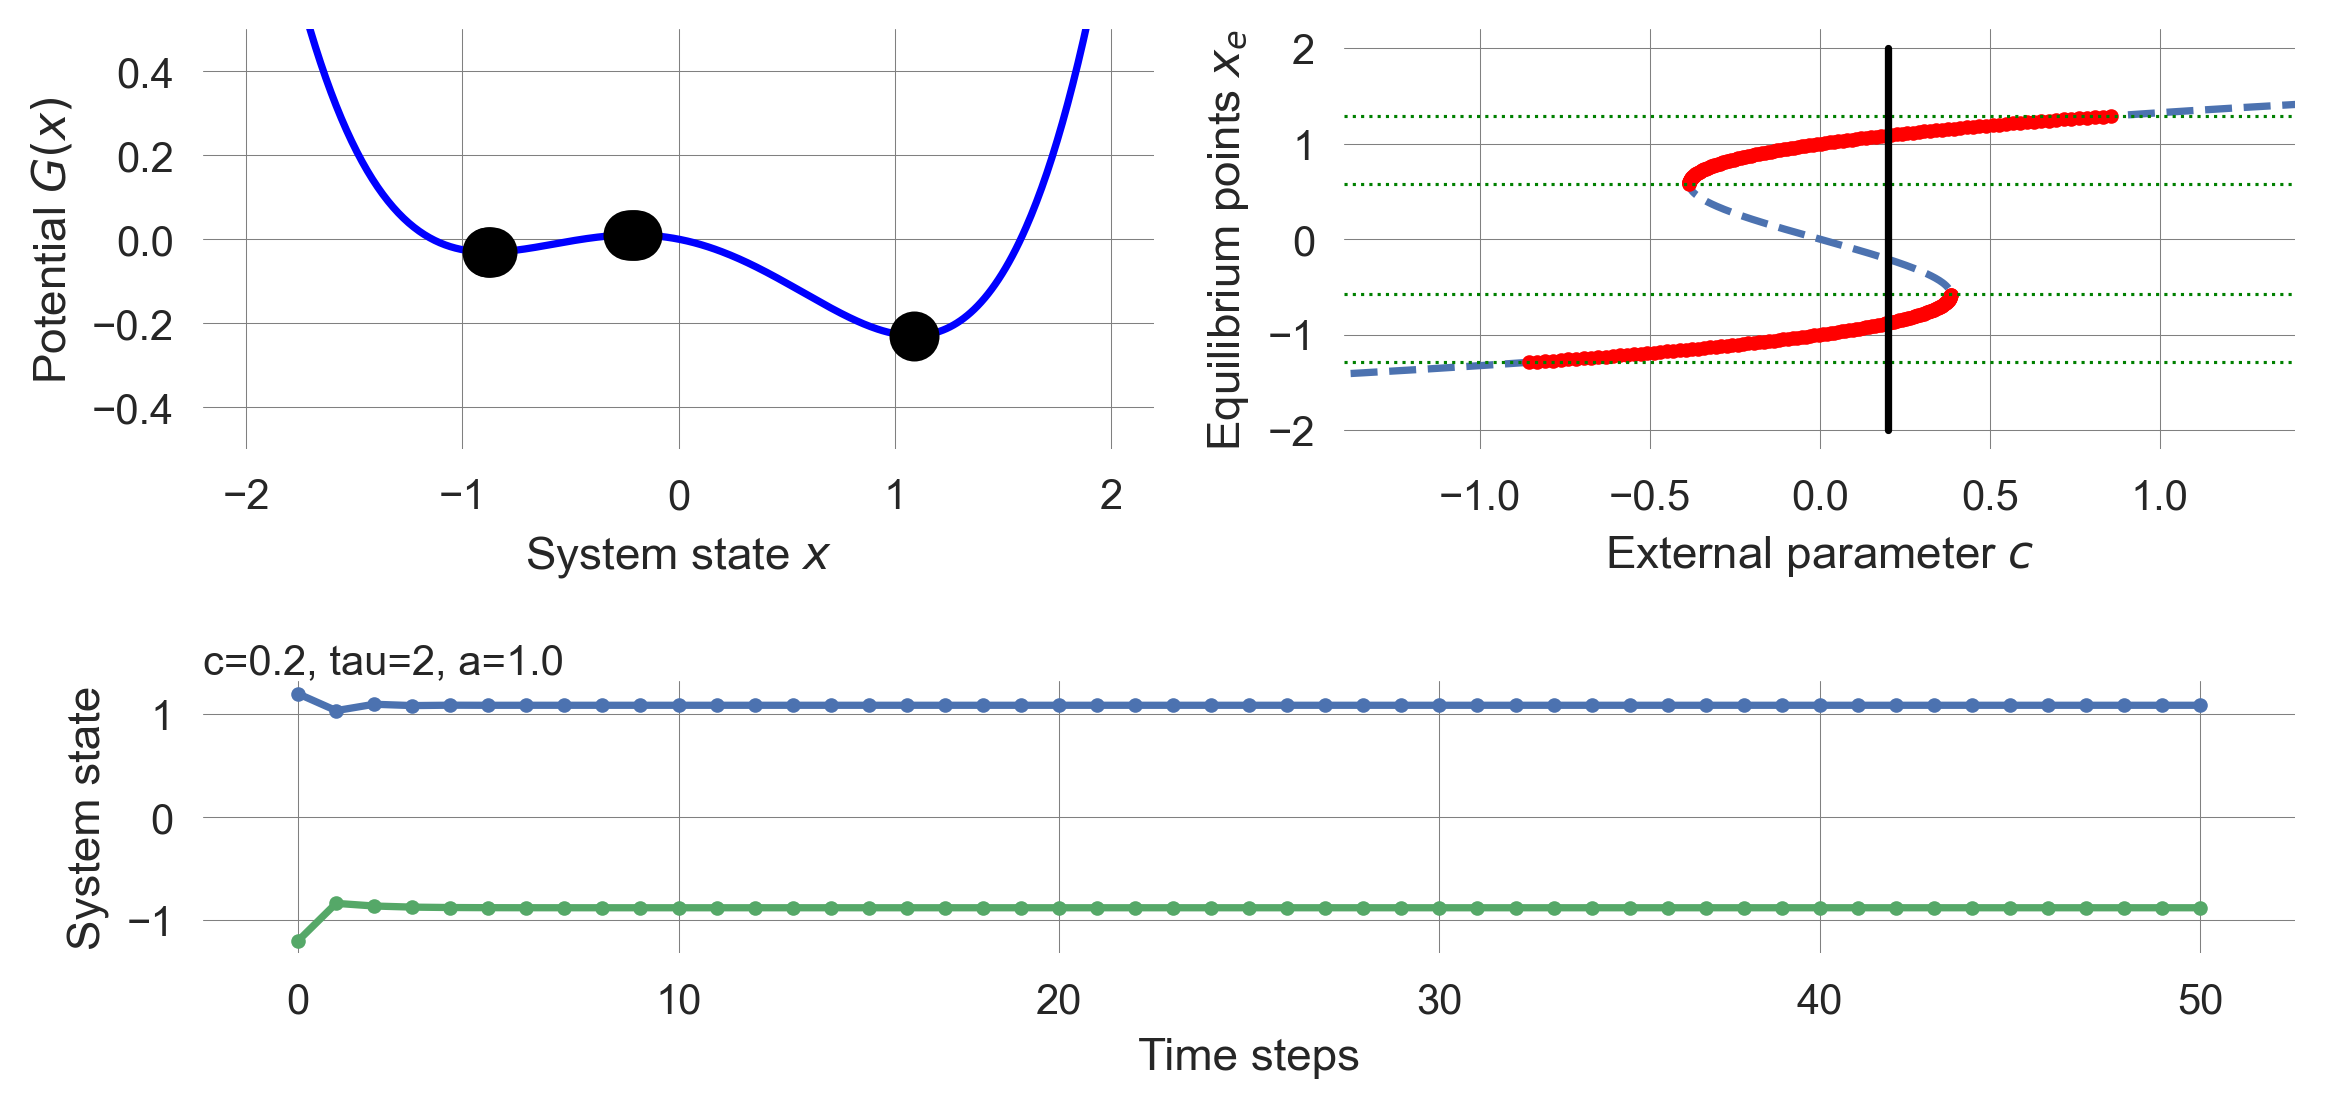

<Figure size 2340x750 with 0 Axes>

In [33]:
plot_all_tipmod();

::: {.content-hidden unless-profile="interactive"}

In [34]:
interact(plot_all_tipmod, c=(-2, 2, 0.01), a=(0.1, 2, 0.1), tau=(0.8, 5, 0.1));

interactive(children=(FloatSlider(value=0.2, description='c', max=2.0, min=-2.0, step=0.01), FloatSlider(value…

:::

### Hysteresis

The last phenomenon we want to explore is **hysteresis**. Hysteresis occurs when the system's behavior depends on its history, i.e., the system's current state depends on its past states.

We let our tipping element model iterate until it reaches an equilibirum point and then slighlty change the external influence parameter $c$. 

1) We start from a low value of external influence parameter $c$ such that the system equilibriates toward the negative equilibrium point and then increae $c$ into the range where only the positive equilibrium point is stable.
2) Then, we decrease $c$ back to the range where only the negative equilibrium point is stable.

In [35]:
def plot_hysteresis():
    x=-1; xs = [] # inital condition and container for the system state
    cvs = np.linspace(-0.8, 0.8, 101);  # values of parameter a to go through
    cvs = np.concatenate((cvs, cvs[::-1])); # first we go up, then we go back down

    for c in cvs: # looping through all parameter values
        for _ in range(100): x=F_tipmod(x, c=c, a=1.0, tau=2.0);  # iterating the system 100 times
        xs.append(x); # storing the last system state

    plt.plot(cvs, xs,'-',alpha=0.5, color='gray',zorder=-1) # Plot background line
    plt.scatter(cvs, xs, alpha=0.9, s=np.arange(len(cvs))[::-1]+1, c=np.arange(len(cvs)), cmap='viridis'); # Colorful plot
    plt.xlabel(r"Influence parameter $c$"); plt.ylabel(r"System state $x$");

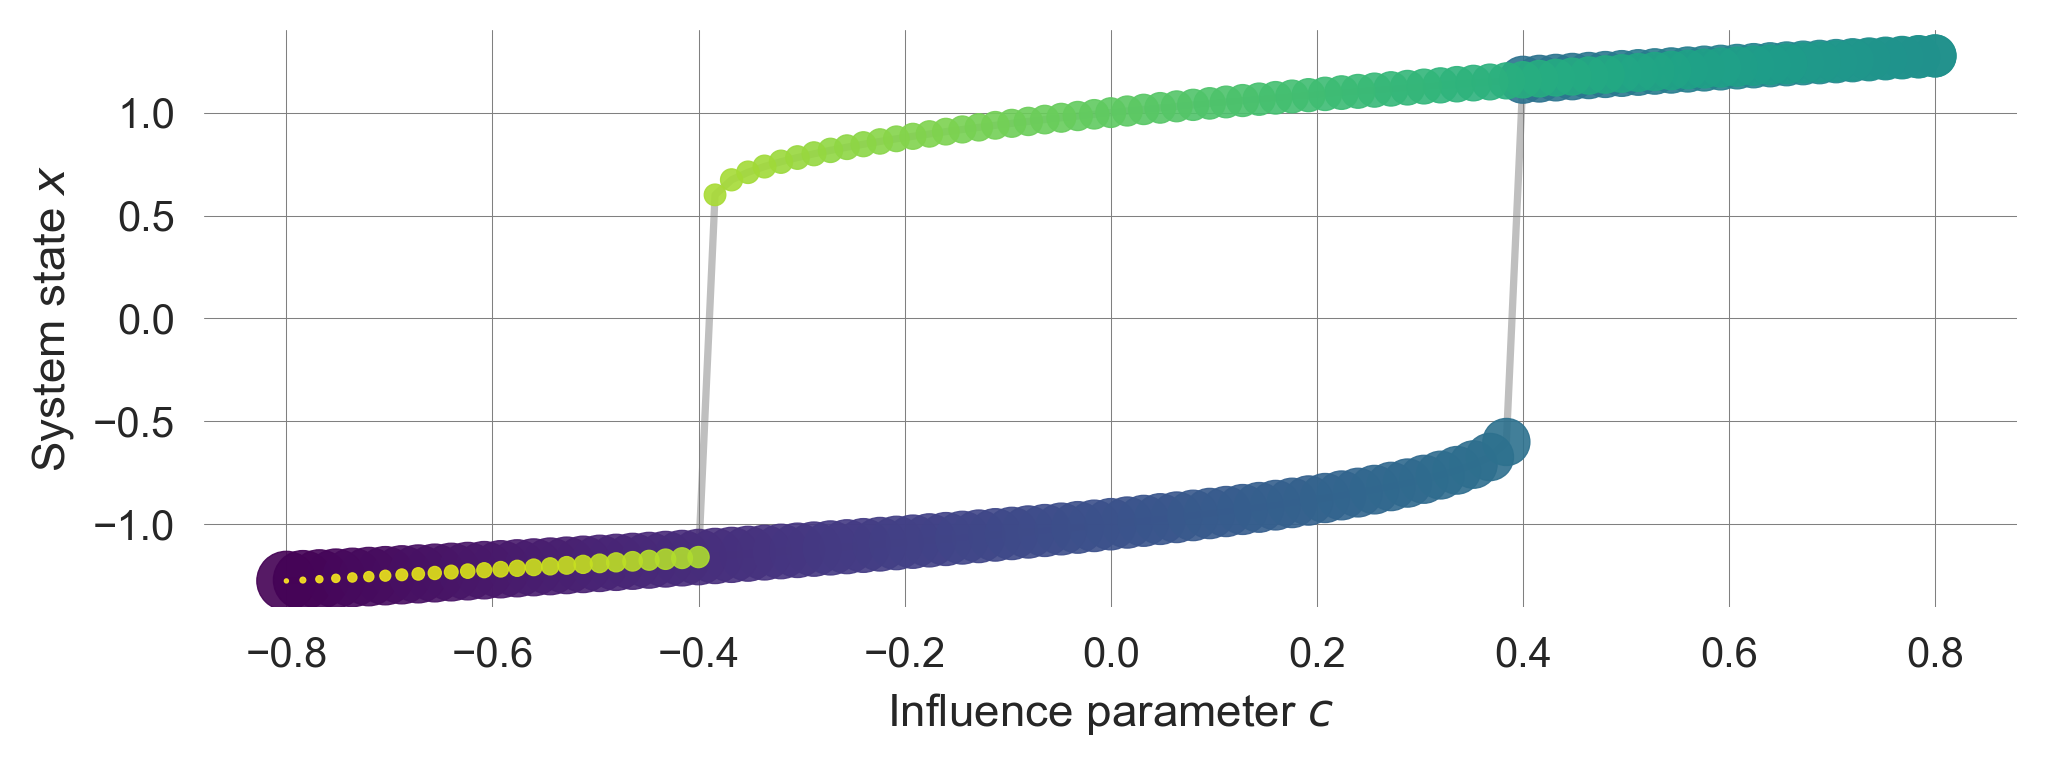

In [36]:
plot_hysteresis()

Time moves from *large* to *small* and *dark* to *light* dots.

Hysteresis is not only a theoretical construct. It occurs in many practical real-world domains from physics, chemistry, engineering, biology, to economics. 

![Hysteresis of the Antarctic Ice Sheet](images/02.02-GarbeHysteresis.dio.png){#fig-Garbe2020}

The hysteresis of the Antarctic Ice Sheet refers to the phenomenon where the ice sheet's response to temperature changes is not symmetric; i.e., the thresholds for ice growth and decline differ significantly (@fig-Garbe2020). This behavior has critical implications for understanding future sea-level rise under global warming scenarios. 

The Antarctic Ice Sheet exhibits multiple temperature thresholds, beyond which ice loss becomes irreversible. For instance, at 2°C warming, West Antarctica faces long-term partial collapse due to marine ice-sheet instability. A significant loss of over 70% of the ice volume is anticipated with 6 to 9°C warming, primarily driven by surface elevation feedback [@GarbeEtAl2020].

## Learning goals revisited

In this chapter, we have explored the concept of a **bifurcation** and its significance in understanding tipping points and regime shifts. We examined how small changes in system parameters can lead to substantial shifts in behavior, highlighting the importance of bifurcations as precursors to critical transitions. 

We then introduced a simple **dynamic system** model to represent a **tipping element** or regime shift, giving us a framework to analyze and simulate how systems behave under the influence of varying forces and feedback mechanisms. In this context, we explained key concepts such as **attractors**, **transients**, **basins of attraction**, and **separatrices**. These elements helped us understand the structure of the system’s state space, illustrating how it is shaped by stable and unstable regions.

To deepen our analysis, we conducted a **bifurcation analysis**, demonstrating how a system’s behavior changes as we adjust specific parameters. This analysis allowed us to identify potential tipping points and provided a practical approach to studying system dynamics.

Furthermore, we constructed a **potential function** and examined its role in bifurcation analysis, as it represents the energy landscape and stability of a system. By analyzing the shape and contours of this potential function, we gained insight into where attractors are located and how the system may transition between states.

Finally, we discussed **hysteresis** and its implications for **sustainability transitions**. We observed that hysteresis introduces a kind of path-dependence, where returning to an original state may require more than simply reversing parameter changes. This phenomenon has critical consequences for sustainability, underscoring the challenges in restoring systems after they have undergone significant transformations. Together, these insights equip us with a deeper understanding of complex system dynamics, emphasizing the importance of identifying and managing critical transitions effectively.

::: {.content-hidden unless-profile="standalone"}

## References

:::

::: {.content-hidden unless-profile="housekeeping"}

## Housekeeping

With the following cells, we can convert this notebook into slides and a PDF handout. If you work with this notebook interactively, you can ignore them.

In [39]:
#!jupyter nbconvert 02.02-TippingElements.ipynb --to slides --embed-images --output-dir "./__slides"

---
metadata-files: [_standalone-quarto.yml]
---

In [41]:
# | output: false 
!cp 02.02-TippingElements.ipynb 02.02-TippingElements_.ipynb
!quarto render 02.02-TippingElements_.ipynb --to pdf --profile standalone
!mv 02.02-TippingElements_.pdf __scripts/02.02-TippingElements.pdf
!rm -r 02.02-TippingElements_*

pandoc 
  to: latex
  output-file: 02.02-TippingElements_.tex
  standalone: true
  pdf-engine: xelatex
  variables:
    graphics: true
    tables: true
    secnumdepth: 2
  default-image-extension: pdf
  metadata-files:
    - _standalone-quarto.yml
  toc-depth: 2
  
metadata
  documentclass: scrartcl
  classoption:
    - DIV=11
    - numbers=noendperiod
  papersize: A4
  header-includes:
    - '\KOMAoption{captions}{tableheading}'
  block-headings: false
  title: Tipping elements
  bibliography:
    - CSMofHEI.bib
  geometry:
    - top=20mm
    - left=20mm
    - right=20mm
    - bottom=25mm
  link-citations: true
  number-depth: 2
  

Rendering PDF
running xelatex - 1
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering extended mode
  
running xelatex - 2
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering extended mode
  

:::